In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

tf.enable_eager_execution()
print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

# TensorFlow and tf.keras

from tensorflow import keras

from google.colab import drive



# This will prompt for authorization.
drive.mount('/content/drive')

1.14.0
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Define Constants

In [0]:
# DEFINE CONSTANTS
data_root_path = "/content/drive/My Drive/Colab Notebooks/raw/raw/"
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [3]:
# IMPORT FILES AND LABELS
import pathlib
data_root = pathlib.Path(data_root_path)
print(data_root)

/content/drive/My Drive/Colab Notebooks/raw/raw


In [4]:
for item in data_root.iterdir():
  print(item)

/content/drive/My Drive/Colab Notebooks/raw/raw/links
/content/drive/My Drive/Colab Notebooks/raw/raw/rechts


In [5]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

413

In [6]:
all_image_paths[:10]

['/content/drive/My Drive/Colab Notebooks/raw/raw/rechts/20190828-100033.jpg',
 '/content/drive/My Drive/Colab Notebooks/raw/raw/links/20190828-094557.jpg',
 '/content/drive/My Drive/Colab Notebooks/raw/raw/links/20190828-100249.jpg',
 '/content/drive/My Drive/Colab Notebooks/raw/raw/rechts/20190828-095435.jpg',
 '/content/drive/My Drive/Colab Notebooks/raw/raw/links/20190828-100451.jpg',
 '/content/drive/My Drive/Colab Notebooks/raw/raw/rechts/20190828-100000.jpg',
 '/content/drive/My Drive/Colab Notebooks/raw/raw/rechts/20190828-100938.jpg',
 '/content/drive/My Drive/Colab Notebooks/raw/raw/links/20190828-095323.jpg',
 '/content/drive/My Drive/Colab Notebooks/raw/raw/rechts/20190828-094545.jpg',
 '/content/drive/My Drive/Colab Notebooks/raw/raw/links/20190828-095627.jpg']


# Inspect the images. Now let's have a quick look at a couple of the images, so you know what you're dealing with:

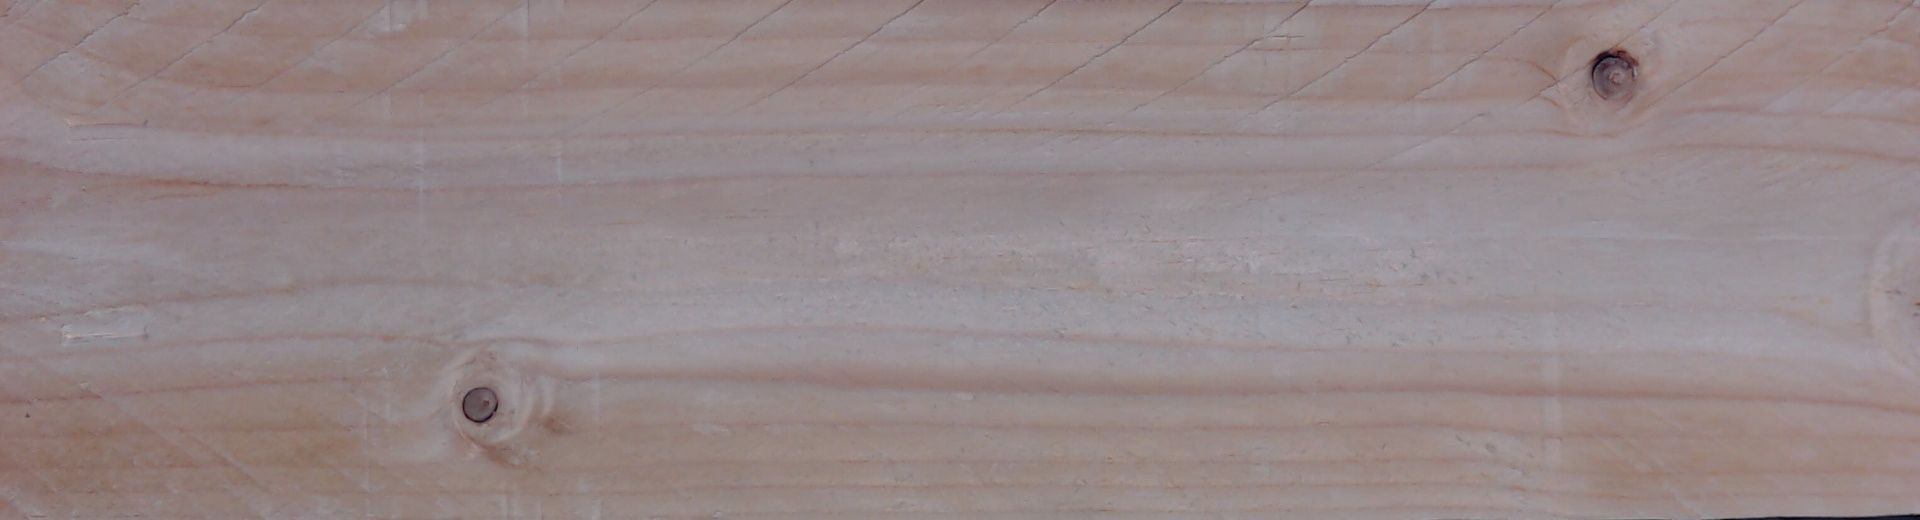

/content/drive/My Drive/Colab Notebooks/raw/raw/links/20190828-094540.jpg



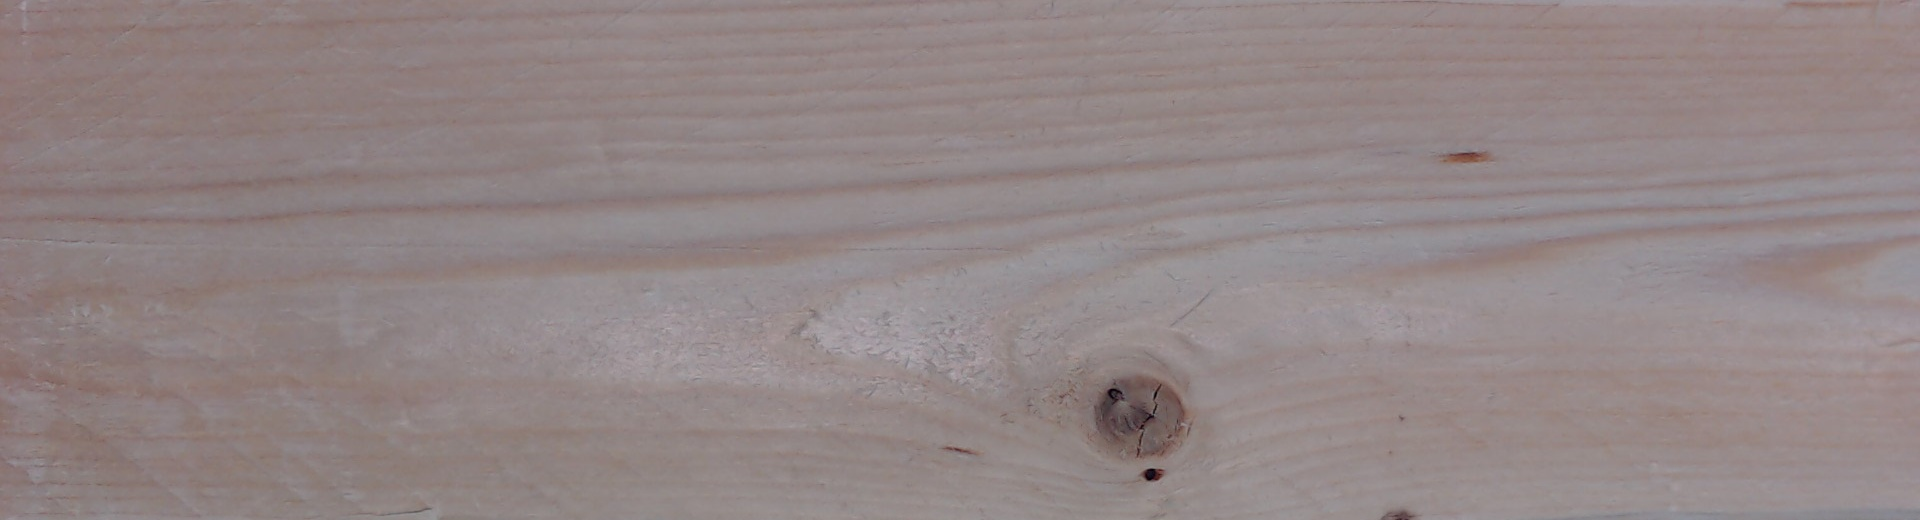

/content/drive/My Drive/Colab Notebooks/raw/raw/links/20190828-100249.jpg



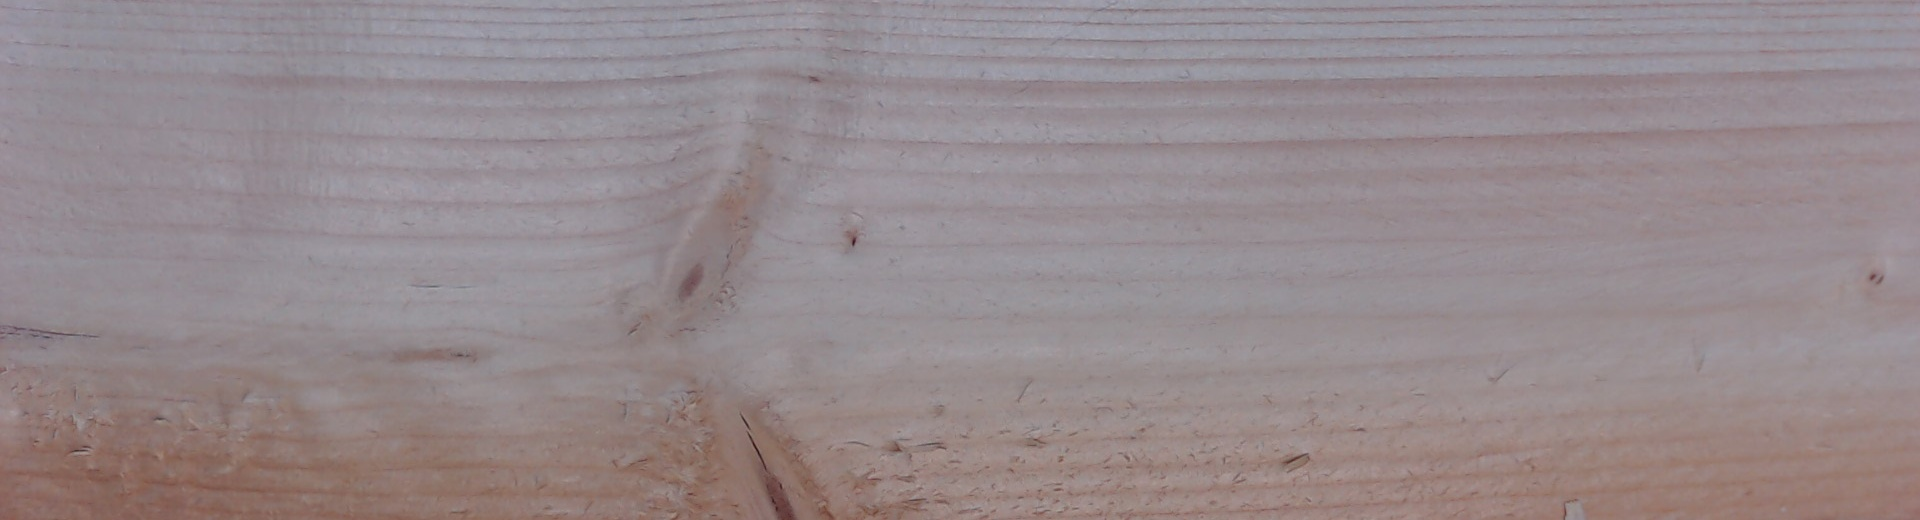

/content/drive/My Drive/Colab Notebooks/raw/raw/rechts/20190828-100349.jpg



In [7]:
import IPython.display as display
import os
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(image_path)
  print()


# Determine the label for each image
## List the available labels:

In [8]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['links', 'rechts']

Assign an index to each label:

In [9]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'links': 0, 'rechts': 1}

Create a list of every file, and its label index

In [10]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]


# Load and format the images
## TensorFlow includes all the tools you need to load and process images:

/content/drive/My Drive/Colab Notebooks/raw/raw/rechts/20190828-100033.jpg


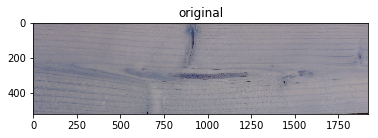

<tf.Tensor: id=115, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00...
tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x02\x08\x07\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\

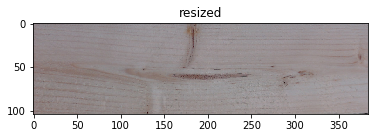

In [16]:
img_path = all_image_paths[0]
print(img_path)

img = cv2.imread(img_path)
plt.imshow(img), plt.title("original")
plt.show()

img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")
print(img_raw)



img_tensor = tf.image.decode_image(img_raw)
#img_tensor = tf.image.decode_jpeg(img_raw)


print("Img_Decoded:")

print(img_tensor.shape)
print(img_tensor.dtype)

img_final = tf.image.resize(img_tensor, [104, 384])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())
plt.imshow(img_final), plt.title("resized")
plt.show()

In [0]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [104, 384])
  image /= 255.0  # normalize to [0,1] range

  return image

In [0]:
def load_and_preprocess_image(path):
  image = tf.read_file(path)
  return preprocess_image(image)

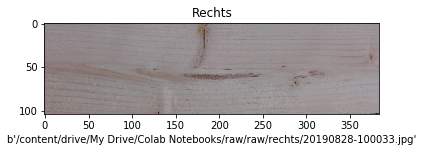

In [22]:
import matplotlib.pyplot as plt

img_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(img_path.encode('utf-8'))
plt.title(label_names[label].title())
print()

Build a tf.data.Dataset
A dataset of images
The easiest way to build a tf.data.Dataset is using the from_tensor_slices method.

Slicing the array of strings results in a dataset of strings:

In [0]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [24]:
print('shape: ', repr(path_ds.output_shapes))
print('type: ', path_ds.output_types)
print()
print(path_ds)

W0904 14:06:31.644146 140093435598720 deprecation.py:323] From <ipython-input-24-2a9400bc986b>:1: DatasetV1.output_shapes (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
W0904 14:06:31.649626 140093435598720 deprecation.py:323] From <ipython-input-24-2a9400bc986b>:2: DatasetV1.output_types (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.


shape:  TensorShape([])
type:  <dtype: 'string'>

<DatasetV1Adapter shapes: (), types: tf.string>


In [0]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

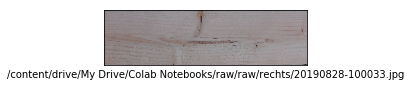

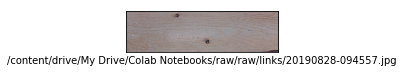

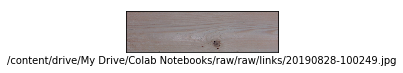

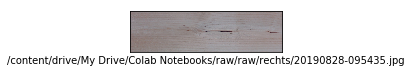

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(all_image_paths[n])
  plt.show()

In [0]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [29]:
for label in label_ds.take(10):
  print(label_names[label.numpy()])

rechts
links
links
rechts
links
rechts
rechts
links
rechts
links


In [0]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [31]:
print(image_label_ds)

<DatasetV1Adapter shapes: ((104, 384, 3), ()), types: (tf.float32, tf.int64)>


In [32]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

# The tuples are unpacked into the positional arguments of the mapped function
def load_and_preprocess_from_path_label(path, label):
  return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<DatasetV1Adapter shapes: ((104, 384, 3), ()), types: (tf.float32, tf.int32)>

In [33]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<DatasetV1Adapter shapes: ((?, 104, 384, 3), (?,)), types: (tf.float32, tf.int32)>

In [34]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

W0904 14:08:22.212500 140093435598720 deprecation.py:323] From <ipython-input-34-4dc713bd4d84>:2: shuffle_and_repeat (from tensorflow.python.data.experimental.ops.shuffle_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


<DatasetV1Adapter shapes: ((?, 104, 384, 3), (?,)), types: (tf.float32, tf.int32)>

In [35]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(104, 384, 3), include_top=False)
mobile_net.trainable=False

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 0s 0us/step


In [36]:
help(keras_applications.mobilenet_v2.preprocess_input)

NameError: ignored

In [0]:
def change_range(image,label):
  return 2*image-1, label

keras_ds = ds.map(change_range)

In [0]:
# The dataset may take a few seconds to start, as it fills its shuffle buffer.
image_batch, label_batch = next(iter(keras_ds))

In [40]:
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)

(32, 4, 12, 1280)


In [0]:
model = tf.keras.Sequential([
  mobile_net,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(len(label_names))])

In [42]:
logit_batch = model(image_batch).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

min logit: -1.1663967
max logit: 2.1348472

Shape: (32, 2)


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [44]:
len(model.trainable_variables)

2

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 4, 12, 1280)       2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [46]:
steps_per_epoch=tf.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

13.0

In [47]:
model.fit(ds, epochs=1, steps_per_epoch=3)

W0904 14:18:00.822520 140093435598720 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


3/3 [==============================] - 14s 5s/step - loss: 2.1902 - acc: 0.4896


In [0]:
import time

def timeit(ds, batches=2*steps_per_epoch+1):
  overall_start = time.time()
  # Fetch a single batch to prime the pipeline (fill the shuffle buffer),
  # before starting the timer
  it = iter(ds.take(batches+1))
  next(it)

  start = time.time()
  for i,(images,labels) in enumerate(it):
    if i%10 == 0:
      print('.',end='')
  print()
  end = time.time()

  duration = end-start
  print("{} batches: {} s".format(batches, duration))
  print("{:0.5f} Images/s".format(BATCH_SIZE*batches/duration))
  print("Total time: {}s".format(end-overall_start))

In [49]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<DatasetV1Adapter shapes: ((?, 104, 384, 3), (?,)), types: (tf.float32, tf.int32)>

In [50]:
timeit(ds)

...
27.0 batches: 6.6440064907073975 s
130.04202 Images/s
Total time: 9.772838115692139s


In [51]:
ds = image_label_ds.cache()
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<DatasetV1Adapter shapes: ((?, 104, 384, 3), (?,)), types: (tf.float32, tf.int32)>

In [52]:
timeit(ds)

...
27.0 batches: 0.19262933731079102 s
4485.29810 Images/s
Total time: 3.157167911529541s


In [0]:
timeit(ds)

In [53]:
ds = image_label_ds.cache(filename='./cache.tf-data')
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(1)
ds

<DatasetV1Adapter shapes: ((?, 104, 384, 3), (?,)), types: (tf.float32, tf.int32)>

In [54]:
timeit(ds)

...
27.0 batches: 0.5616347789764404 s
1538.36627 Images/s
Total time: 4.08249568939209s


In [0]:
image_ds = tf.data.Dataset.from_tensor_slices(all_image_paths).map(tf.read_file)
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
tfrec.write(image_ds)

In [0]:
image_ds = tf.data.TFRecordDataset('images.tfrec').map(preprocess_image)

In [57]:
ds = tf.data.Dataset.zip((image_ds, label_ds))
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds=ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds

<DatasetV1Adapter shapes: ((?, 104, 384, 3), (?,)), types: (tf.float32, tf.int64)>

In [58]:
timeit(ds)

...
27.0 batches: 5.22129225730896 s
165.47628 Images/s
Total time: 7.712541103363037s


In [59]:
paths_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
image_ds = paths_ds.map(load_and_preprocess_image)
image_ds

<DatasetV1Adapter shapes: (104, 384, 3), types: tf.float32>

In [60]:
ds = image_ds.map(tf.serialize_tensor)
ds

<DatasetV1Adapter shapes: (), types: tf.string>

In [0]:
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
tfrec.write(ds)

In [62]:
ds = tf.data.TFRecordDataset('images.tfrec')

def parse(x):
  result = tf.parse_tensor(x, out_type=tf.float32)
  result = tf.reshape(result, [192, 192, 3])
  return result

ds = ds.map(parse, num_parallel_calls=AUTOTUNE)
ds

<DatasetV1Adapter shapes: (192, 192, 3), types: tf.float32>

In [63]:
ds = tf.data.Dataset.zip((ds, label_ds))
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds=ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds

<DatasetV1Adapter shapes: ((?, 192, 192, 3), (?,)), types: (tf.float32, tf.int64)>

In [68]:
first_10_percent = image_ds.Split.TRAIN.subsplit(image_ds.percent[:10])

AttributeError: ignored